In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates = ['Date'])

df['Total Cases']= df[['Confirmed', 'Recovered', 'Deaths']].sum(axis= 1)
df

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
45491,2020-09-15,Zimbabwe,7576,5783,224,13583
45492,2020-09-16,Zimbabwe,7598,5823,224,13645
45493,2020-09-17,Zimbabwe,7633,5841,224,13698
45494,2020-09-18,Zimbabwe,7647,5883,224,13754


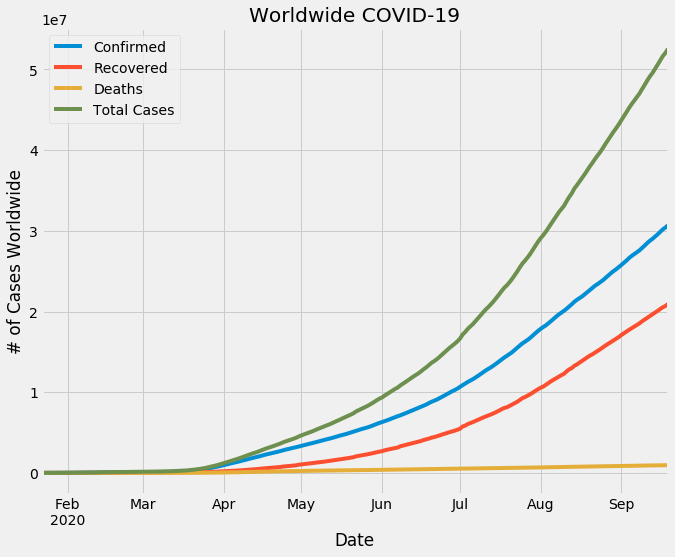

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
45491,2020-09-15,Zimbabwe,7576,5783,224,13583
45492,2020-09-16,Zimbabwe,7598,5823,224,13645
45493,2020-09-17,Zimbabwe,7633,5841,224,13698
45494,2020-09-18,Zimbabwe,7647,5883,224,13754


In [5]:
#Worldwide  Cases

worldwide_df= df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize= (10,8))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID-19')

plt.show()
df

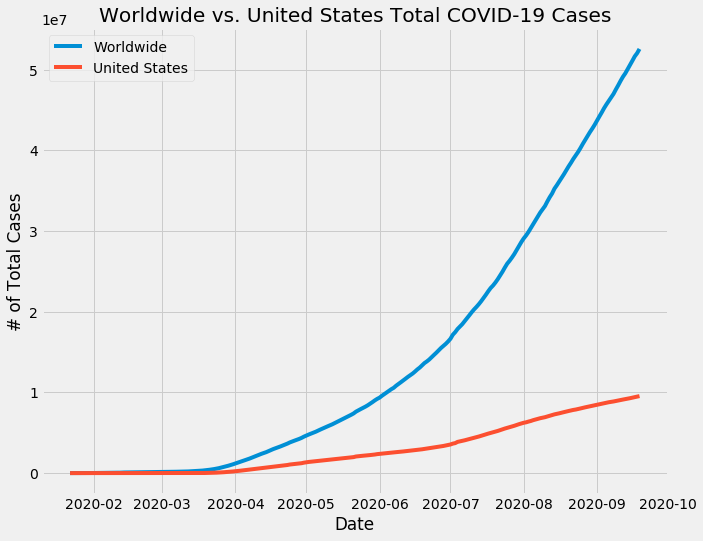

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
45491,2020-09-15,Zimbabwe,7576,5783,224,13583
45492,2020-09-16,Zimbabwe,7598,5823,224,13645
45493,2020-09-17,Zimbabwe,7633,5841,224,13698
45494,2020-09-18,Zimbabwe,7647,5883,224,13754


In [6]:
us_df = df[df['Country']=='US'].groupby(['Date']).sum()

fig = plt.figure(figsize= (10, 8))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(us_df[['Total Cases']], label='United States')

ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. United States Total COVID-19 Cases')

plt.legend(loc= 'upper left')
plt.show()
df

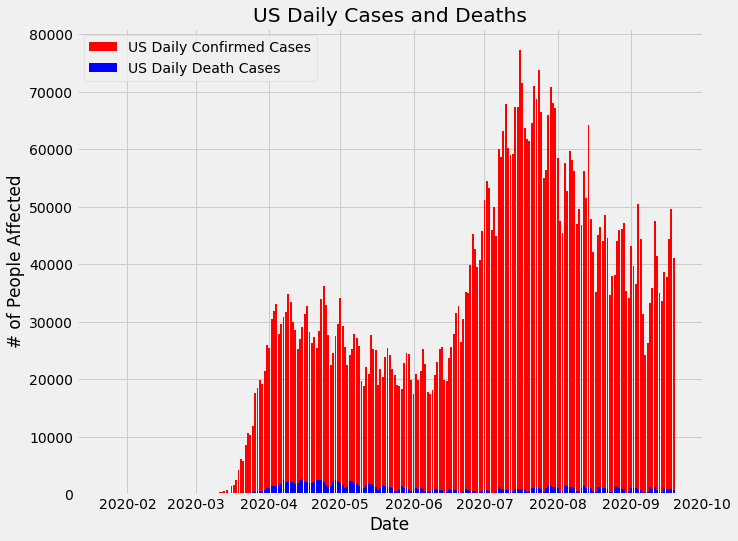

In [14]:
us_df= us_df.reset_index()
us_df['Daily Confirmed']= us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths']= us_df['Deaths'].sub(us_df['Deaths'].shift())

#Stack Chart of US daily confirmed and deaths cases

fig = plt.figure(figsize= (10, 8))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color= 'r', label ='US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color= 'b', label ='US Daily Death Cases')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('US Daily Cases and Deaths')
plt.legend(loc= 'upper left')
plt.show()

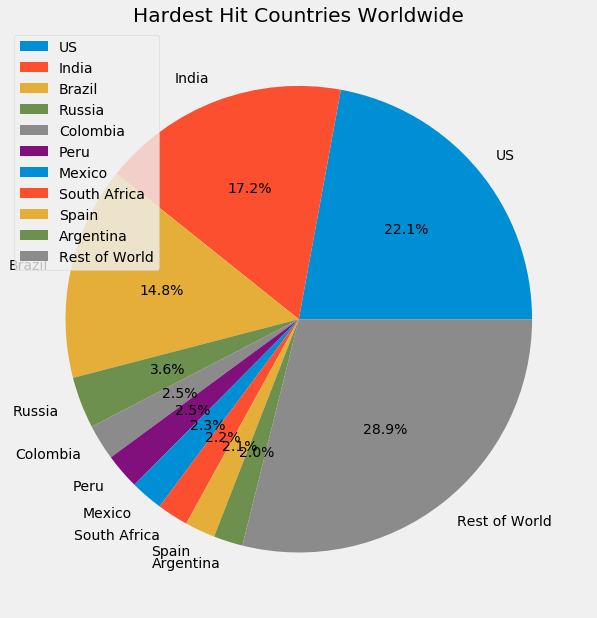

In [24]:
from datetime import date, timedelta
yesterday = '2020-9-20'    #yesterday= date.today() - timedelta(days=1)
#yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date'] == yesterday]
#today_df
top_10 = today_df.sort_values(['Confirmed'], ascending= False) [:10]
#top_10
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending= False) [10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels = top_10['Country'], autopct= '%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()